In [165]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM , Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [166]:
df=pd.read_csv("/content/seattle-weather.csv")

In [167]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [168]:
import pandas as pd
null_values = df.isnull().sum()

# Print the count of null values for each column
null_values


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Text(0.5, 0, 'parameter')

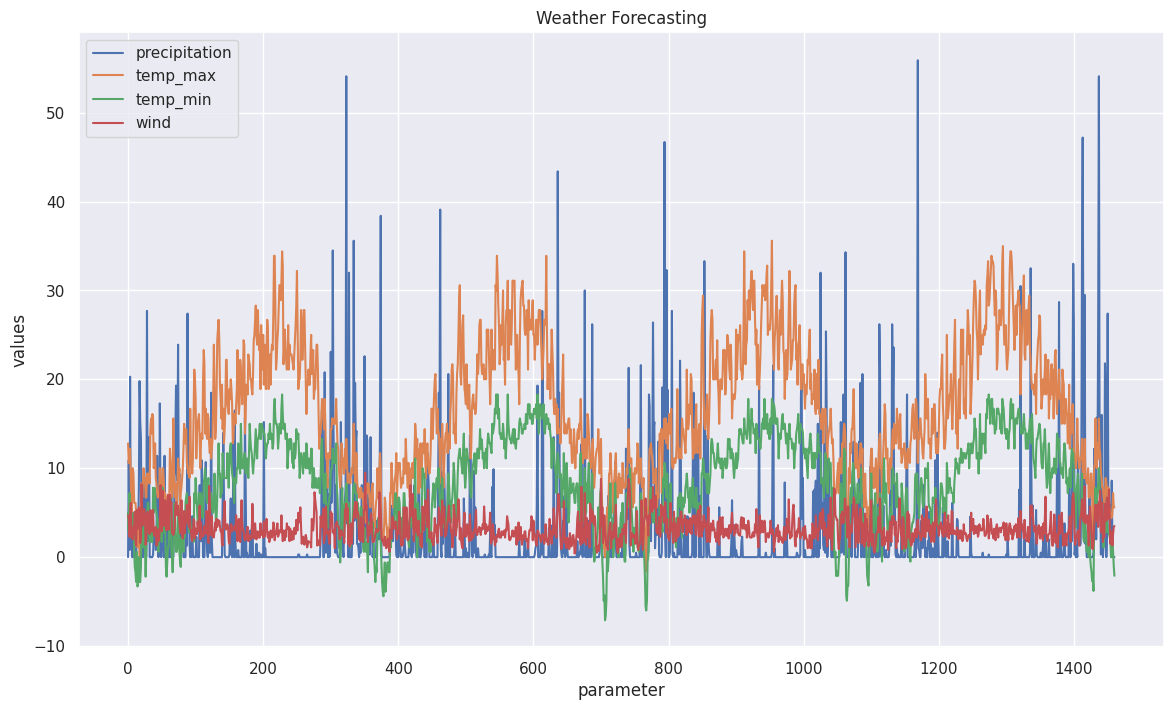

In [169]:
df.plot(kind='line', figsize=(14,8))
plt.title("Weather Forecasting")
plt.ylabel("values")
plt.xlabel("parameter")

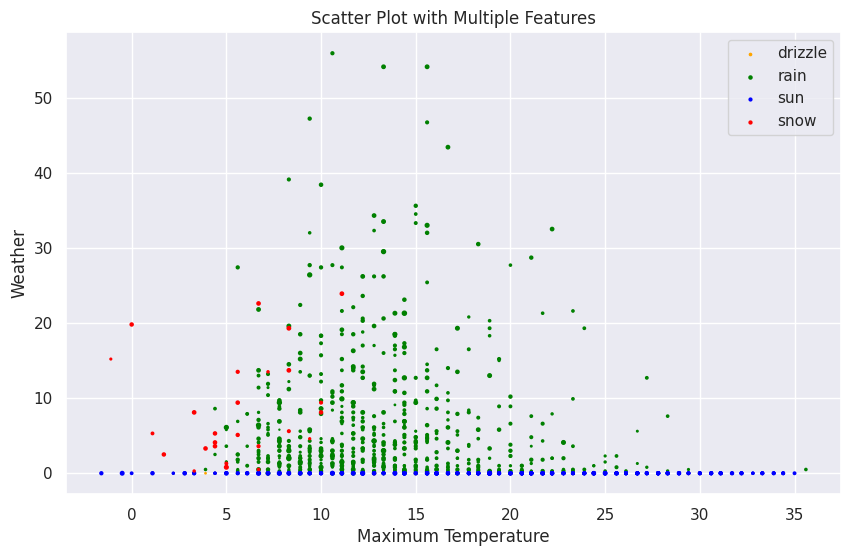

In [170]:

fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for each weather category with different colors
for weather_category, color in zip(df['weather'].unique(), ['orange', 'green', 'blue', 'red']):
    subset = df[df['weather'] == weather_category]
    ax.scatter(subset['temp_max'], subset['precipitation'], subset['wind'], label=weather_category, color=color)

plt.title("Scatter Plot with Multiple Features")
plt.xlabel("Maximum Temperature")
plt.ylabel("Weather")
plt.legend()
plt.show()



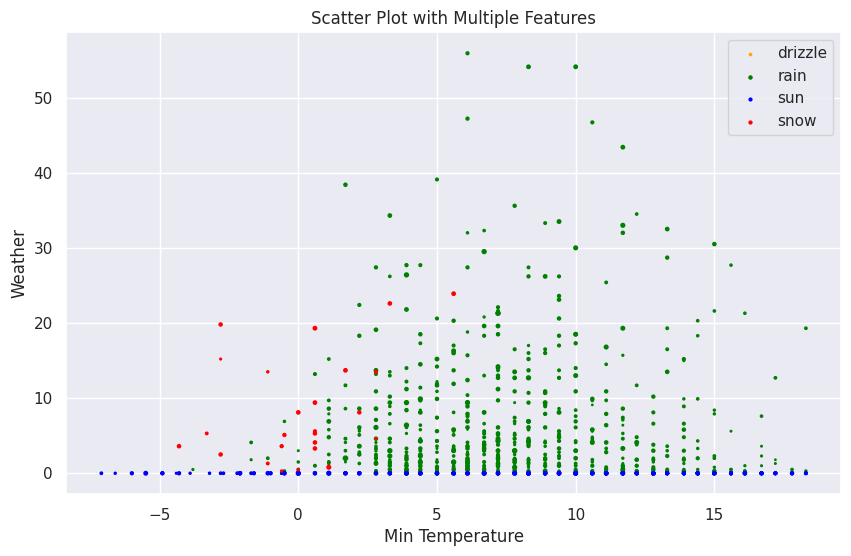

In [171]:
# Scatter plot with multiple features on the x-axis and different colors
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot for each weather category with different colors
for weather_category, color in zip(df['weather'].unique(), ['orange', 'green', 'blue','red']):
    subset = df[df['weather'] == weather_category]
    ax.scatter(subset['temp_min'], subset['precipitation'], subset['wind'], label=weather_category, color=color)

plt.title("Scatter Plot with Multiple Features")
plt.xlabel("Min Temperature")
plt.ylabel("Weather")
plt.legend()
plt.show()


In [172]:
df.head(2)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain


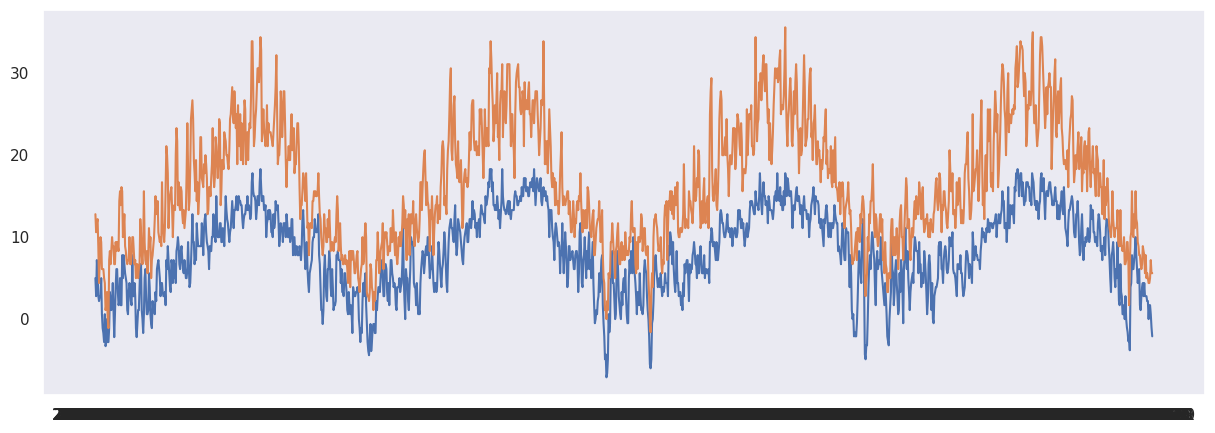

In [173]:
# Visualizing the temperature, observing if there's abnormal data
plt.figure(figsize = (15, 5))
fig = plt.plot(df['date'], df[['temp_min', 'temp_max']])
plt.grid()

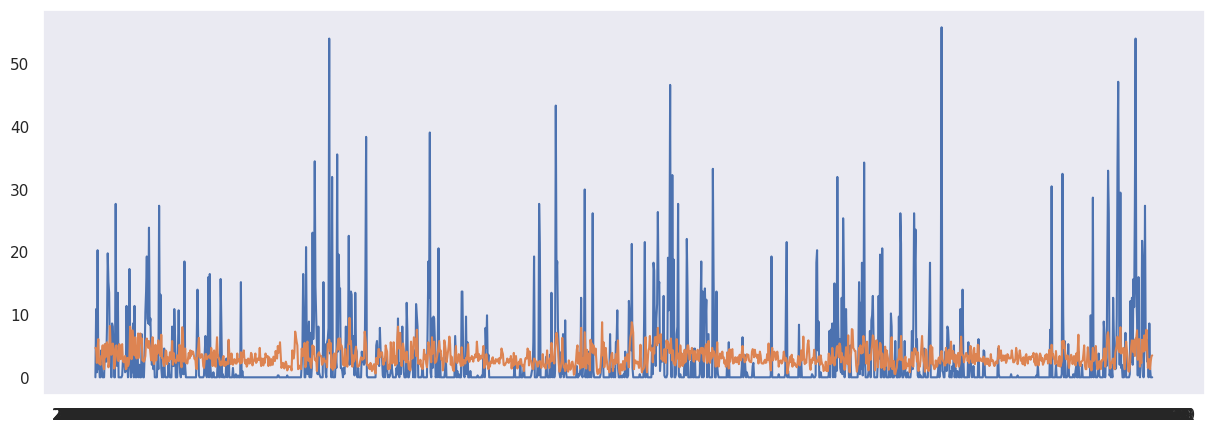

In [174]:

plt.figure(figsize = (15, 5))
fig2 = plt.plot(df['date'], df[['precipitation', 'wind']])
plt.grid()


In [175]:
import pandas as pd
import plotly.express as px

# Assuming 'date' column is not in datetime format
df['date'] = pd.to_datetime(df['date'])

# Now you can use the .dt accessor
df['month'] = df['date'].dt.strftime('%B')

fig = px.box(df, x='month', y=['temp_min', 'temp_max'], title='Warmest and Coldest Monthly Temperature')
fig.update_layout(title='Warmest and Coldest Monthly Temperature')
fig.show()


In [176]:
train_dates=pd.to_datetime(df['date'])

In [177]:
train_dates

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [178]:
# Apply one-hot encoding to the 'weather' column
hot_encod = pd.get_dummies(df, columns=['weather'], prefix='weather')

# Display the DataFrame after encoding
print(hot_encod)

           date  precipitation  temp_max  temp_min  wind     month  \
0    2012-01-01            0.0      12.8       5.0   4.7   January   
1    2012-01-02           10.9      10.6       2.8   4.5   January   
2    2012-01-03            0.8      11.7       7.2   2.3   January   
3    2012-01-04           20.3      12.2       5.6   4.7   January   
4    2012-01-05            1.3       8.9       2.8   6.1   January   
...         ...            ...       ...       ...   ...       ...   
1456 2015-12-27            8.6       4.4       1.7   2.9  December   
1457 2015-12-28            1.5       5.0       1.7   1.3  December   
1458 2015-12-29            0.0       7.2       0.6   2.6  December   
1459 2015-12-30            0.0       5.6      -1.0   3.4  December   
1460 2015-12-31            0.0       5.6      -2.1   3.5  December   

      weather_drizzle  weather_fog  weather_rain  weather_snow  weather_sun  
0                   1            0             0             0            0  
1  

In [179]:
hot_encod.head(2)

,date,precipitation,temp_max,temp_min,wind,month,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,January,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,January,0,0,1,0,0


In [180]:
import copy
df1 = copy.deepcopy(hot_encod)
print(df1)

           date  precipitation  temp_max  temp_min  wind     month  \
0    2012-01-01            0.0      12.8       5.0   4.7   January   
1    2012-01-02           10.9      10.6       2.8   4.5   January   
2    2012-01-03            0.8      11.7       7.2   2.3   January   
3    2012-01-04           20.3      12.2       5.6   4.7   January   
4    2012-01-05            1.3       8.9       2.8   6.1   January   
...         ...            ...       ...       ...   ...       ...   
1456 2015-12-27            8.6       4.4       1.7   2.9  December   
1457 2015-12-28            1.5       5.0       1.7   1.3  December   
1458 2015-12-29            0.0       7.2       0.6   2.6  December   
1459 2015-12-30            0.0       5.6      -1.0   3.4  December   
1460 2015-12-31            0.0       5.6      -2.1   3.5  December   

      weather_drizzle  weather_fog  weather_rain  weather_snow  weather_sun  
0                   1            0             0             0            0  
1  

In [181]:
# cols = list(df1.columns[1:])
# print(cols)

In [182]:
cols = list(df1.columns[1:2])
print(cols)

['precipitation']


<Axes: >

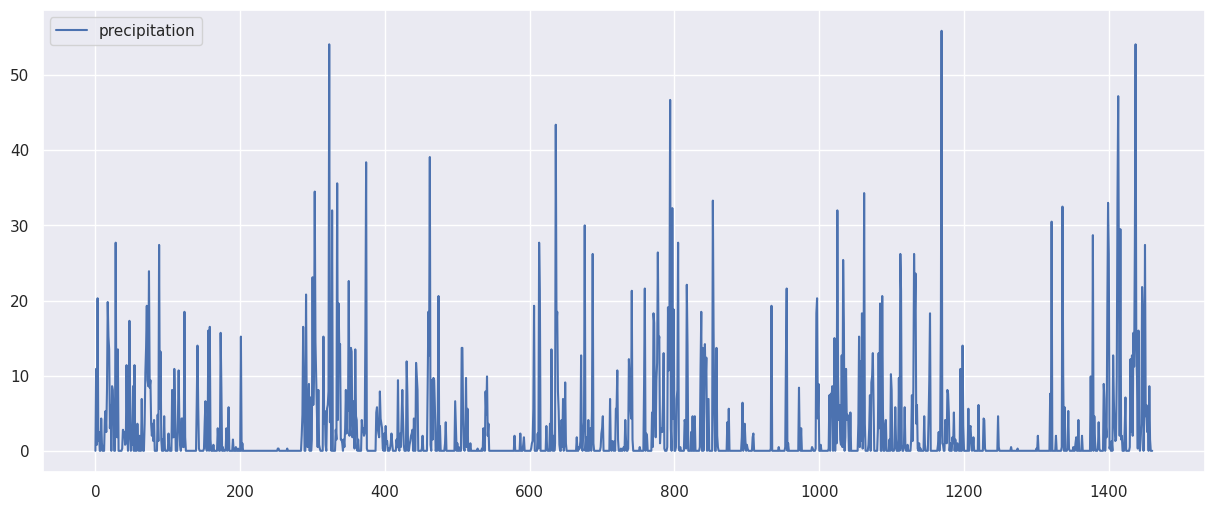

In [183]:
training_df = df1[cols].astype(float)
plot_df=training_df
fig, ax = plt.subplots(figsize=(15, 6))
plot_df.plot.line(ax=ax)

In [184]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [185]:
import numpy as np

# Assuming df1 is your DataFrame after one-hot encoding and scaling
# 'weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun' are your encoded weather categories

# Extract the relevant columns
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
target = ['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']

# Create sequences for training data and target values
sequence_length = 10  # You can adjust this based on your requirements

trainX, trainY = [], []

for i in range(len(training_df_scaled) - sequence_length):
    trainX.append(training_df_scaled[i:i + sequence_length, :])
    trainY.append(df1[target].values[i + sequence_length, :])

# Convert lists to NumPy arrays
trainX = np.array(trainX)
trainY = np.array(trainY)

# Print the shape of the arrays
print("Shape of trainX:", trainX.shape)
print("Shape of trainY:", trainY.shape)


Shape of trainX: (1451, 10, 1)
Shape of trainY: (1451, 5)


In [186]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Assuming trainX.shape[1:] represents the input shape (number of time steps, number of features)
input_shape = trainX.shape[1:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=len(target), activation='softmax'))  # Adjust the activation based on your problem

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()






Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 10, 50)            10400     
                                                                 
 dropout_24 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_25 (LSTM)              (None, 10, 50)            20200     
                                                                 
 dropout_25 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_26 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 5)                

In [187]:
# Train the model
batch_size = 32# You can adjust this based on your dataset size
epochs = 32  # You can adjust this based on the convergence of the model

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/32
37/37 [==============================] - 6s 39ms/step - loss: 1.3532 - accuracy: 0.4974 - val_loss: 1.0415 - val_accuracy: 0.6048
Epoch 2/32
37/37 [==============================] - 0s 11ms/step - loss: 1.1151 - accuracy: 0.4905 - val_loss: 1.0317 - val_accuracy: 0.6151
Epoch 3/32
37/37 [==============================] - 0s 12ms/step - loss: 1.0930 - accuracy: 0.5121 - val_loss: 1.0247 - val_accuracy: 0.6048
Epoch 4/32
37/37 [==============================] - 0s 10ms/step - loss: 1.0872 - accuracy: 0.5026 - val_loss: 1.0290 - val_accuracy: 0.6117
Epoch 5/32
37/37 [==============================] - 0s 11ms/step - loss: 1.0819 - accuracy: 0.5207 - val_loss: 1.0219 - val_accuracy: 0.6186
Epoch 6/32
37/37 [==============================] - 0s 11ms/step - loss: 1.0957 - accuracy: 0.4957 - val_loss: 1.0225 - val_accuracy: 0.6151
Epoch 7/32
37/37 [==============================] - 1s 15ms/step - loss: 1.0841 - accuracy: 0.5190 - val_loss: 1.0169 - val_accuracy: 0.6151
Epoch 8/32
37

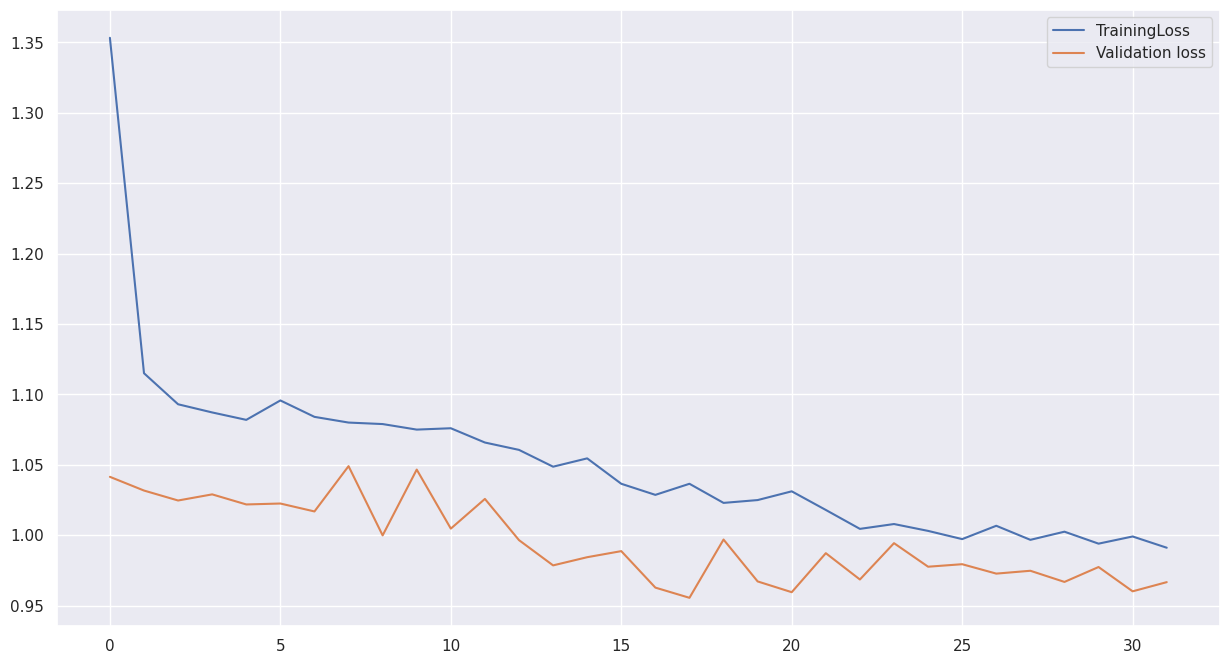

In [188]:
plt.plot(history.history['loss'], label='TrainingLoss')
plt.plot(history.history['val_loss'], label='Validation loss')

plt.legend()

In [189]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 1
n_days_for_prediction=200

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

prediction = model.predict(trainX[-n_days_for_prediction:])
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=-1)
y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]
z_pred_future = scalar.inverse_transform(prediction_copies)[:,1]
w_pred_future = scalar.inverse_transform(prediction_copies)[:,2]
x_pred_future = scalar.inverse_transform(prediction_copies)[:,3]
# convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
     forecast_dates.append(time_i.date())

# df_forecast = pd.DataFrame({'date': np.array(forecast_dates), 'precipatation','temp_max', 'temp_min','wind': y_pred_future})
# df_forecast['date'] = pd.to_datetime(df_forecast['date'])
df_forecast = pd.DataFrame({
    'date': np.array(forecast_dates),
    'precipitation': y_pred_future,  # Corrected column name
    'temp_max': z_pred_future,  # Replace with your actual values
    'temp_min': w_pred_future,  # Replace with your actual values
    'wind': z_pred_future  # Replace with your actual values
})

df_forecast['date'] = pd.to_datetime(df_forecast['date'])

7/7 [==============================] - 1s 4ms/step


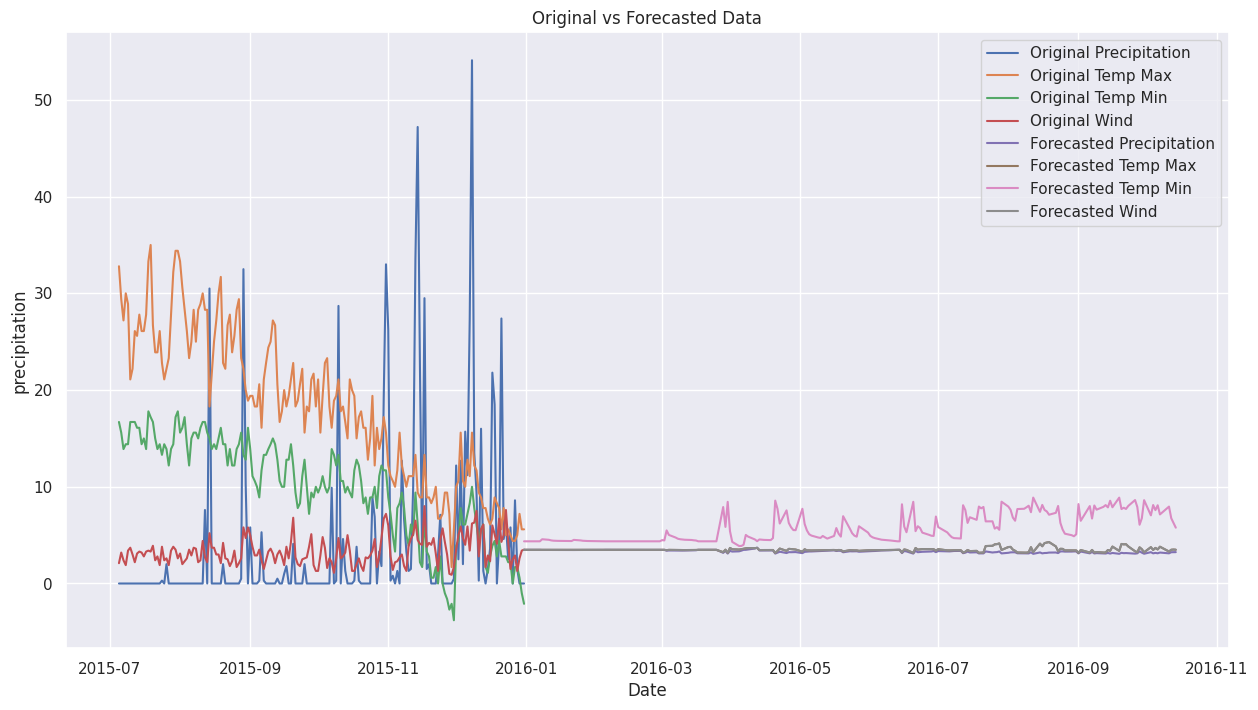

In [190]:
import seaborn as sns

original = df[['date', 'precipitation', 'temp_max', 'temp_min', 'wind']].copy()  # Explicitly create a copy
original['date'] = pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2015-07-5']

sns.set(rc={'figure.figsize': (15, 8)})
sns.lineplot(x=original['date'], y=original['precipitation'], label='Original Precipitation')
sns.lineplot(x=original['date'], y=original['temp_max'], label='Original Temp Max')
sns.lineplot(x=original['date'], y=original['temp_min'], label='Original Temp Min')
sns.lineplot(x=original['date'], y=original['wind'], label='Original Wind')

sns.lineplot(x=df_forecast['date'], y=df_forecast['precipitation'], label='Forecasted Precipitation')
sns.lineplot(x=df_forecast['date'], y=df_forecast['temp_max'], label='Forecasted Temp Max')
sns.lineplot(x=df_forecast['date'], y=df_forecast['temp_min'], label='Forecasted Temp Min')
sns.lineplot(x=df_forecast['date'], y=df_forecast['wind'], label='Forecasted Wind')


plt.xlabel('Date')
plt.title('Original vs Forecasted Data')
plt.legend()
plt.show()


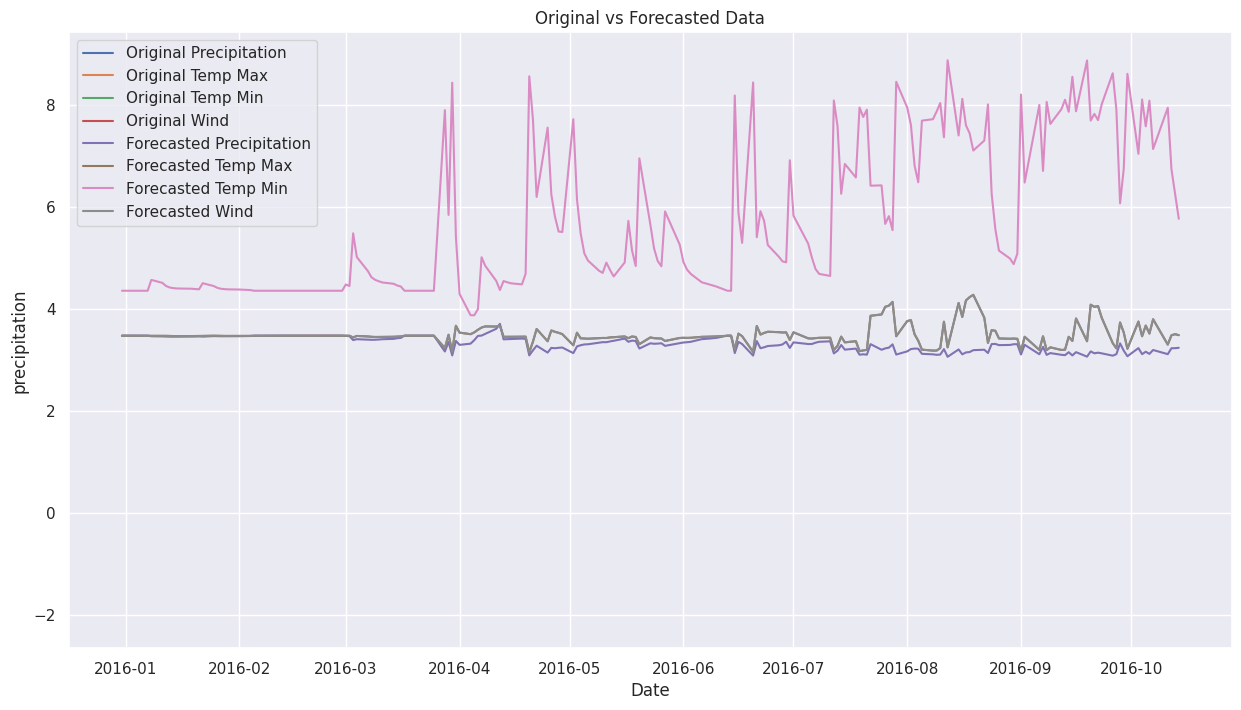

In [191]:
import seaborn as sns

original = df[['date', 'precipitation', 'temp_max', 'temp_min', 'wind']].copy()  # Explicitly create a copy
original['date'] = pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2015-12-31']

sns.set(rc={'figure.figsize': (15, 8)})
sns.lineplot(x=original['date'], y=original['precipitation'], label='Original Precipitation')
sns.lineplot(x=original['date'], y=original['temp_max'], label='Original Temp Max')
sns.lineplot(x=original['date'], y=original['temp_min'], label='Original Temp Min')
sns.lineplot(x=original['date'], y=original['wind'], label='Original Wind')

sns.lineplot(x=df_forecast['date'], y=df_forecast['precipitation'], label='Forecasted Precipitation')
sns.lineplot(x=df_forecast['date'], y=df_forecast['temp_max'], label='Forecasted Temp Max')
sns.lineplot(x=df_forecast['date'], y=df_forecast['temp_min'], label='Forecasted Temp Min')
sns.lineplot(x=df_forecast['date'], y=df_forecast['wind'], label='Forecasted Wind')


plt.xlabel('Date')
plt.title('Original vs Forecasted Data')
plt.legend()
plt.show()

In [192]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 1
n_days_for_prediction=200

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

prediction = model.predict(trainX[-n_days_for_prediction:])
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=-1)
y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]
# convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
     forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'date': np.array(forecast_dates), 'precipatation': y_pred_future})
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

7/7 [==============================] - 0s 4ms/step


In [193]:
print(df_forecast.columns)


Index(['date', 'precipatation'], dtype='object')


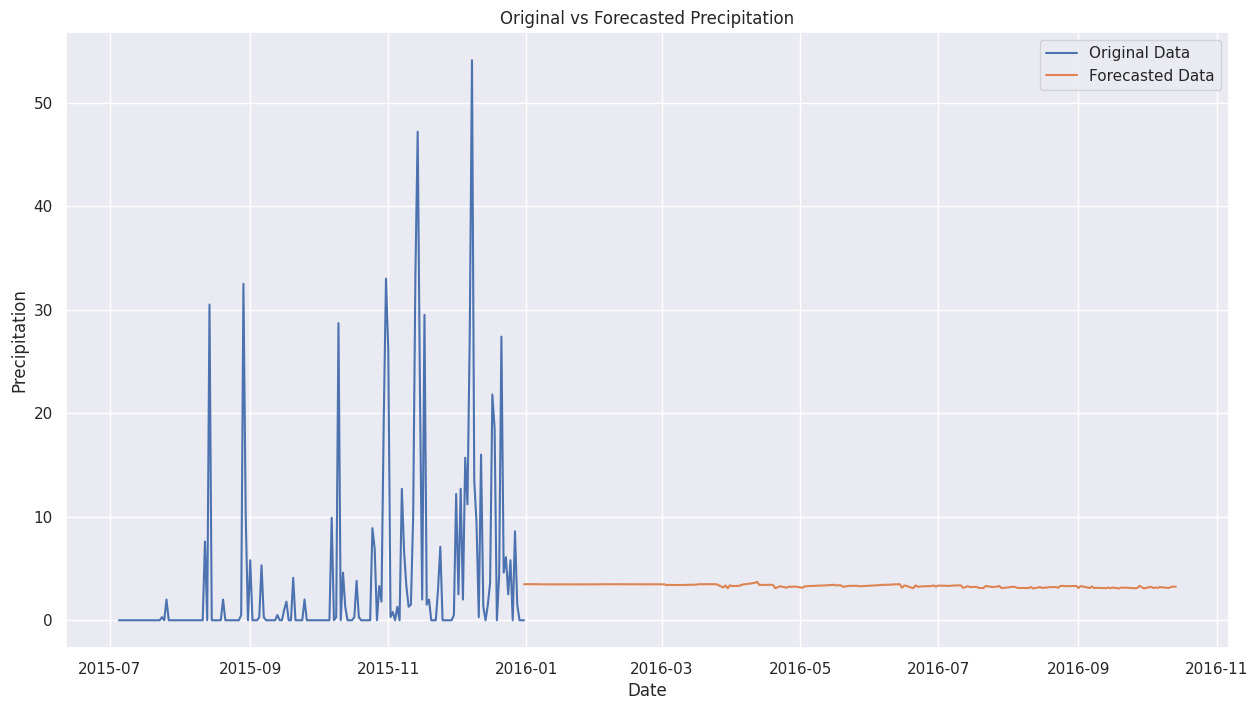

In [194]:
import seaborn as sns

original = df[['date', 'precipitation']].copy()  # Explicitly create a copy
original['date'] = pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2015-07-05']

sns.set(rc={'figure.figsize': (15, 8)})
sns.lineplot(x=original['date'], y=original['precipitation'], label='Original Data')
sns.lineplot(x=df_forecast['date'], y=df_forecast['precipatation'], label='Forecasted Data')


plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Original vs Forecasted Precipitation')
plt.legend()
plt.show()


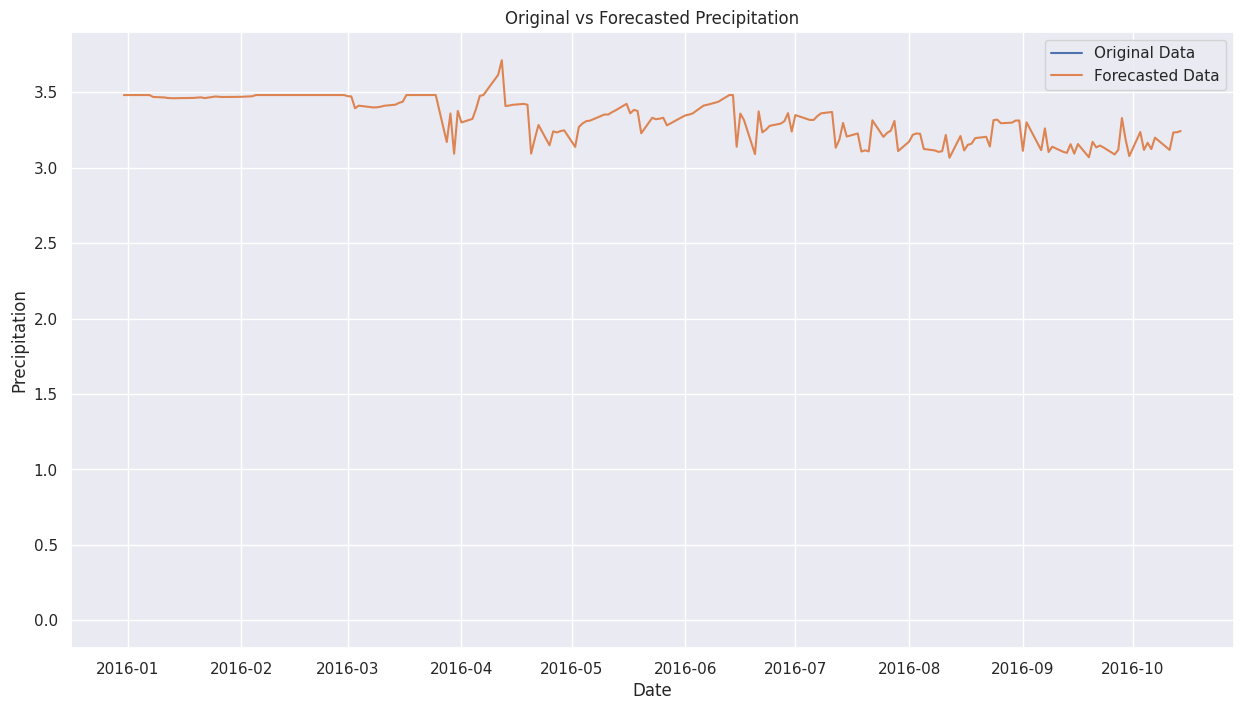

In [195]:
# 2015-12-31 is last row of my dataset col[Date]

import seaborn as sns

original = df[['date', 'precipitation']].copy()  # Explicitly create a copy
original['date'] = pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2015-12-31']

sns.set(rc={'figure.figsize': (15, 8)})
sns.lineplot(x=original['date'], y=original['precipitation'], label='Original Data')
sns.lineplot(x=df_forecast['date'], y=df_forecast['precipatation'], label='Forecasted Data')


plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Original vs Forecasted Precipitation')
plt.legend()
plt.show()




In [196]:

# Create sequences for test data and target values
sequence_length = 10  # You can adjust this based on your requirements

testX, testY = [], []

for i in range(len(training_df_scaled) - sequence_length):
    testX.append(training_df_scaled[i:i + sequence_length, :])
    testY.append(df1[target].values[i + sequence_length, :])

# Convert lists to NumPy arrays
testX = np.array(testX)
testY = np.array(testY)

# Print the shape of the arrays
print("Shape of trainX:", testX.shape)
print("Shape of trainY:", testY.shape)

Shape of trainX: (1451, 10, 1)
Shape of trainY: (1451, 5)


46/46 [==============================] - 0s 3ms/step


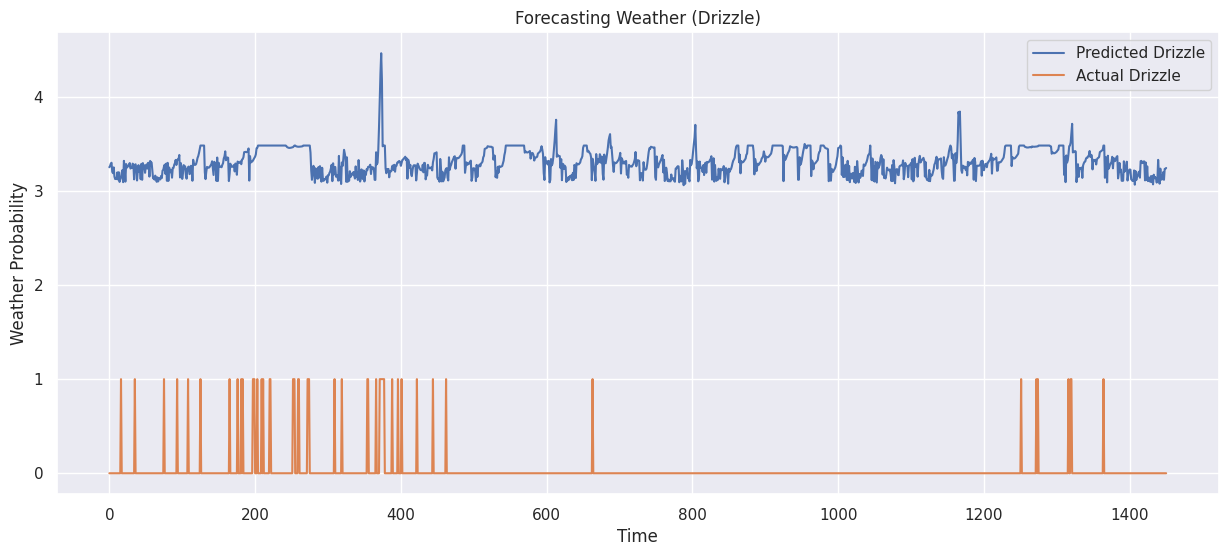

In [197]:


# Make predictions on test data
predictions = model.predict(testX)

# Inverse transform the predictions to the original scale
predictions_original_scale = scalar.inverse_transform(predictions)

# Evaluate or visualize the predictions as needed
# For example, you can plot the predicted values against the actual values

plt.figure(figsize=(15, 6))
plt.plot(predictions_original_scale[:, 0], label='Predicted Drizzle')
plt.plot(testY[:, 0], label='Actual Drizzle')
plt.legend()
plt.title('Forecasting Weather (Drizzle)')
plt.xlabel('Time')
plt.ylabel('Weather Probability')
plt.show()


In [198]:
# weather_drizzle	weather_fog	weather_rain	weather_snow	weather_sun

46/46 [==============================] - 0s 5ms/step


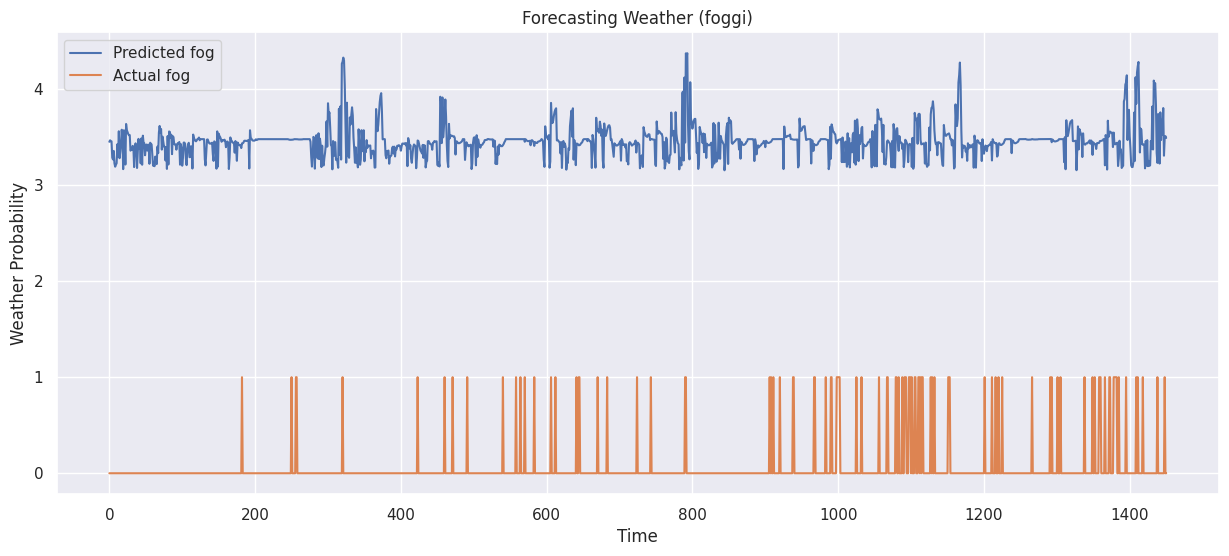

In [199]:

# Make predictions on test data
predictions = model.predict(testX)

# Inverse transform the predictions to the original scale
predictions_original_scale = scalar.inverse_transform(predictions)

# Evaluate or visualize the predictions as needed
# For example, you can plot the predicted values against the actual values

plt.figure(figsize=(15, 6))
plt.plot(predictions_original_scale[:, 1], label='Predicted fog')
plt.plot(testY[:, 1], label='Actual fog')
plt.legend()
plt.title('Forecasting Weather (foggi)')
plt.xlabel('Time')
plt.ylabel('Weather Probability')
plt.show()

46/46 [==============================] - 0s 3ms/step


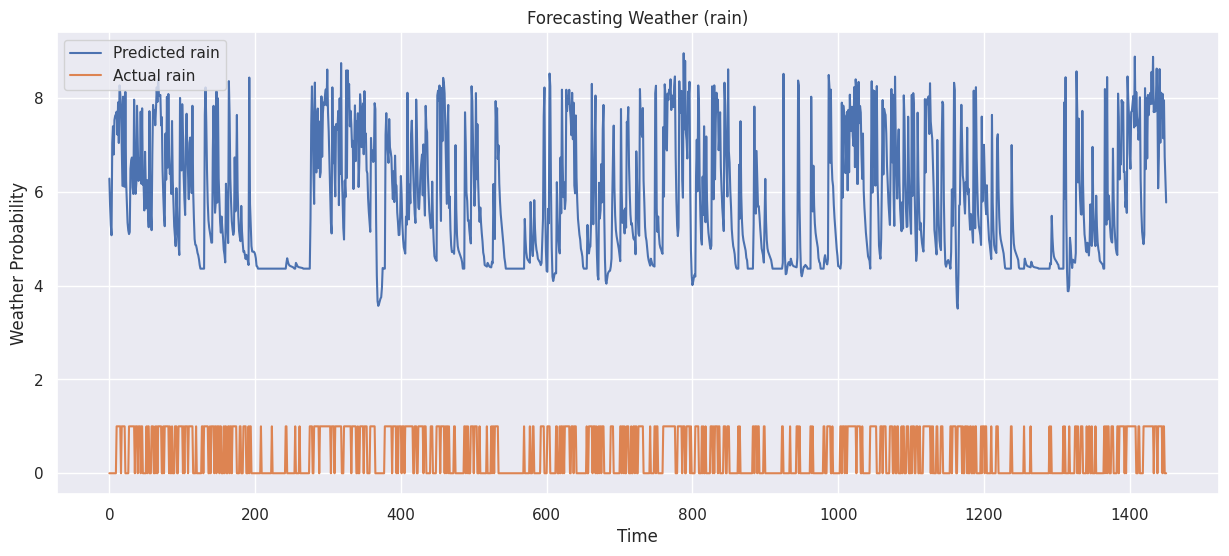

In [200]:


# Make predictions on test data
predictions = model.predict(testX)

# Inverse transform the predictions to the original scale
predictions_original_scale = scalar.inverse_transform(predictions)

# Evaluate or visualize the predictions as needed
# For example, you can plot the predicted values against the actual values

plt.figure(figsize=(15, 6))
plt.plot(predictions_original_scale[:, 2], label='Predicted rain')
plt.plot(testY[:, 2], label='Actual rain')
plt.legend()
plt.title('Forecasting Weather (rain)')
plt.xlabel('Time')
plt.ylabel('Weather Probability')
plt.show()

46/46 [==============================] - 0s 5ms/step


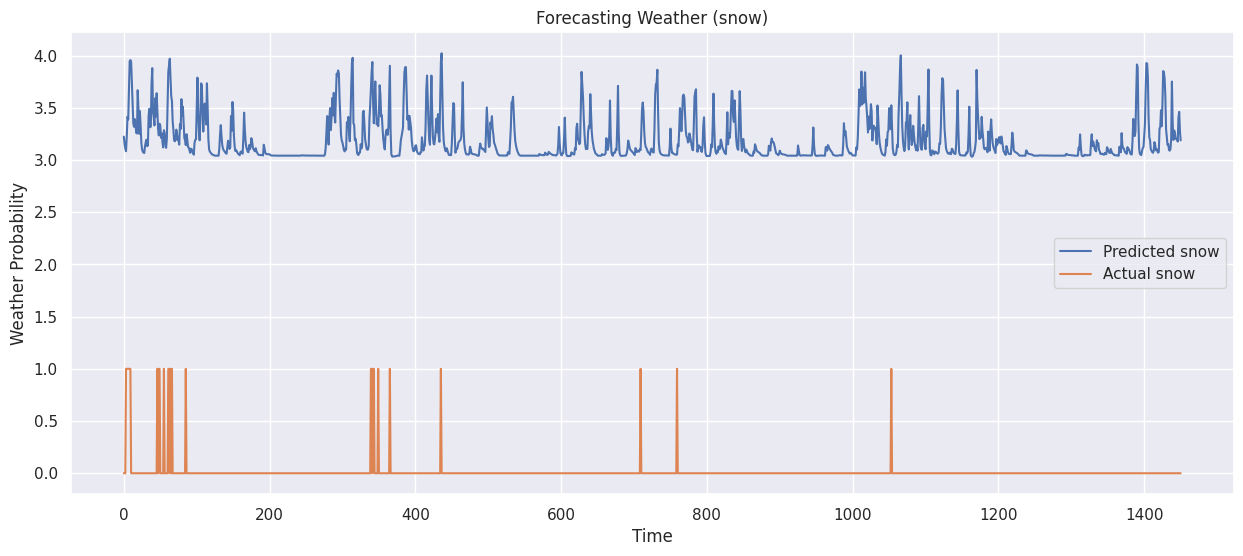

In [201]:


# Make predictions on test data
predictions = model.predict(testX)

# Inverse transform the predictions to the original scale
predictions_original_scale = scalar.inverse_transform(predictions)

# Evaluate or visualize the predictions as needed
# For example, you can plot the predicted values against the actual values

plt.figure(figsize=(15, 6))
plt.plot(predictions_original_scale[:, 3], label='Predicted snow')
plt.plot(testY[:, 3], label='Actual snow')
plt.legend()
plt.title('Forecasting Weather (snow)')
plt.xlabel('Time')
plt.ylabel('Weather Probability')
plt.show()

46/46 [==============================] - 0s 4ms/step


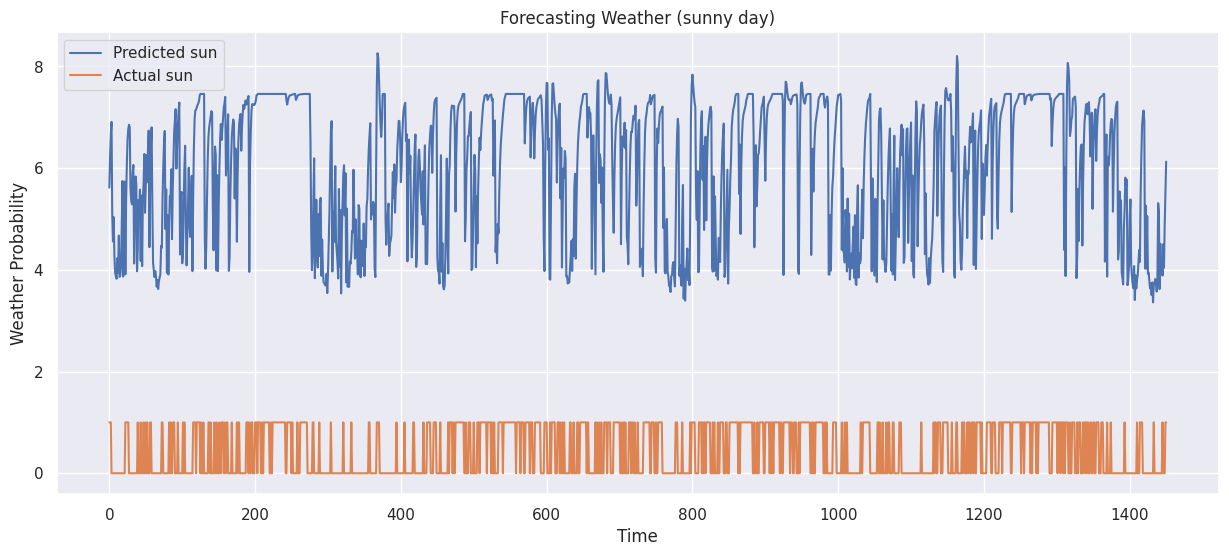

In [202]:


# Make predictions on test data
predictions = model.predict(testX)

# Inverse transform the predictions to the original scale
predictions_original_scale = scalar.inverse_transform(predictions)

# Evaluate or visualize the predictions as needed
# For example, you can plot the predicted values against the actual values

plt.figure(figsize=(15, 6))
plt.plot(predictions_original_scale[:, 4], label='Predicted sun')
plt.plot(testY[:, 4], label='Actual sun')
plt.legend()
plt.title('Forecasting Weather (sunny day)')
plt.xlabel('Time')
plt.ylabel('Weather Probability')
plt.show()